In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv('Dataset Training V5.csv')
df_test=pd.read_csv('df_cifno_dataset_clear_n6m_max.csv')
display(df_train.head())
display(df_train.shape)
display(df_test.head())
df_test.shape

,cifno,umur,region,jenis_kelamin,pendidikan,status_nikah,jenis_pekerjaan,omset_per_bulan,sumber_penghasilan,penghasilan_per_bulan,...,flag_good_merc_n5m,flag_good_merc_n6m,flag_good_merc_n7m,flag_good_merc_n8m,flag_good_merc_n9m,flag_good_merc_n10m,flag_good_merc_n11m,flag_good_merc_n12m,modified_date,ds
0,AAHN915,26.0,D,M,NaN,K,Wiraswasta,NaN,NaN,NaN,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2021-08-20T14:17:50.745Z,202108
1,ACGR477,34.0,K,M,NaN,K,Wiraswasta,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2021-08-20T14:17:50.745Z,202108
2,AMN3609,32.0,Q,F,NaN,K,Wiraswasta,NaN,NaN,NaN,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2021-08-20T14:17:50.745Z,202108
3,AP83081,44.0,X,M,NaN,B,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,2021-08-20T14:17:50.745Z,202108
4,AQLS720,37.0,L,M,NaN,K,Wiraswasta,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,2021-08-20T14:17:50.745Z,202108


(17456, 175)

,cifno,umur,region,jenis_kelamin,status_nikah,jenis_pekerjaan,has_sms_fin,has_internet_fin,has_tabungan,has_giro,...,avg_amt_credit_l6m,range_amt_credit_l6m,diff_avg_amt_cd_l3m,diff_avg_amt_cd_l6m,diff_avg_freq_cd_l3m,diff_avg_freq_cd_l6m,flag_good_merc_n6m_max,flag_good_merc_n6m_ratas,modified_date,ds
0,AAGW749,30.0,K,M,B,Others,0.0,1.0,1.0,0.0,...,1.000000e+05,0.0,47500.0,47500.0,5.0,5.0,0.0,0.0,2021-08-26T12:57:27.499Z,202108
1,ABBV340,28.0,G,M,B,Wiraswasta,0.0,0.0,1.0,0.0,...,4.069033e+07,0.0,4894512.0,4894512.0,2.0,2.0,1.0,1.0,2021-08-26T12:57:27.499Z,202108
2,ABXF886,38.0,R,M,K,Wiraswasta,1.0,1.0,1.0,1.0,...,1.049515e+07,1419830.0,1531847.0,1531847.0,6.0,6.0,1.0,0.0,2021-08-26T12:57:27.499Z,202108
3,AER7581,36.0,N,M,K,Pedagang,0.0,1.0,1.0,0.0,...,1.280511e+09,571483852.0,204165241.0,77248361.0,3.0,2.0,1.0,0.0,2021-08-26T12:57:27.499Z,202108
4,AKJJ249,42.0,B,M,K,Missing,0.0,0.0,1.0,0.0,...,1.349231e+08,171033339.0,6568254.0,495509.0,120.0,173.0,0.0,0.0,2021-08-26T12:57:27.499Z,202108


(10321, 166)

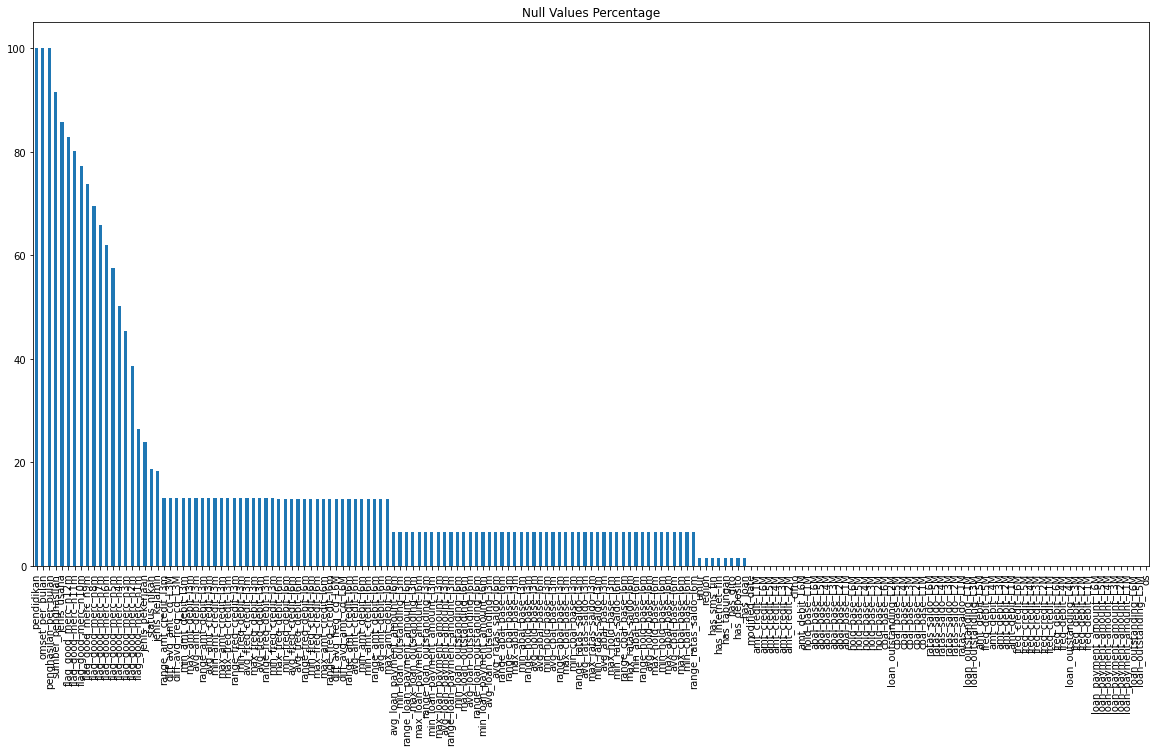

In [3]:
fig,ax = plt.subplots(figsize=(20,10))
(df_train.isna().sum()/df_train.shape[0]*100).sort_values(ascending=False).plot(kind='bar')
plt.title('Null Values Percentage')
plt.show()

Label yang akan digunakan adalah flag_good_merc_n1m, didapatkan

<AxesSubplot:>

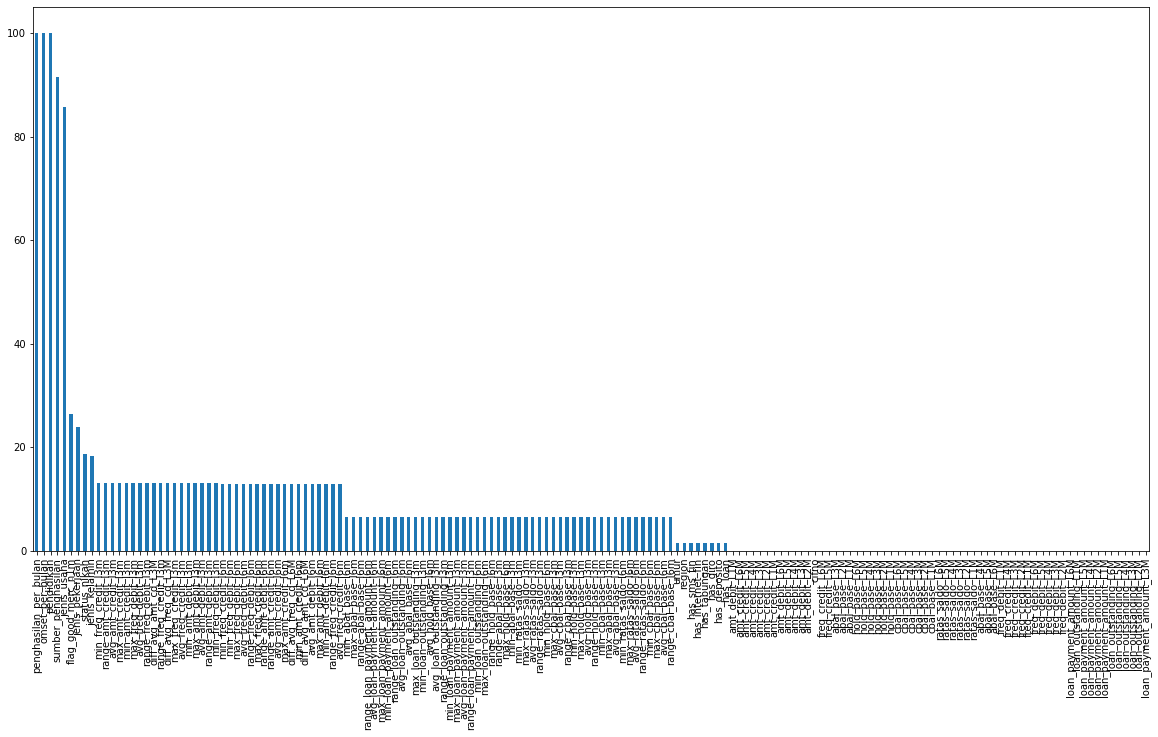

In [4]:
df_train1=df_train.drop(df_train.loc[:,'flag_good_merc_n2m':'ds'].columns,axis=1)
fig,ax = plt.subplots(figsize=(20,10))
(df_train1.isna().sum()/df_train1.shape[0]*100).sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

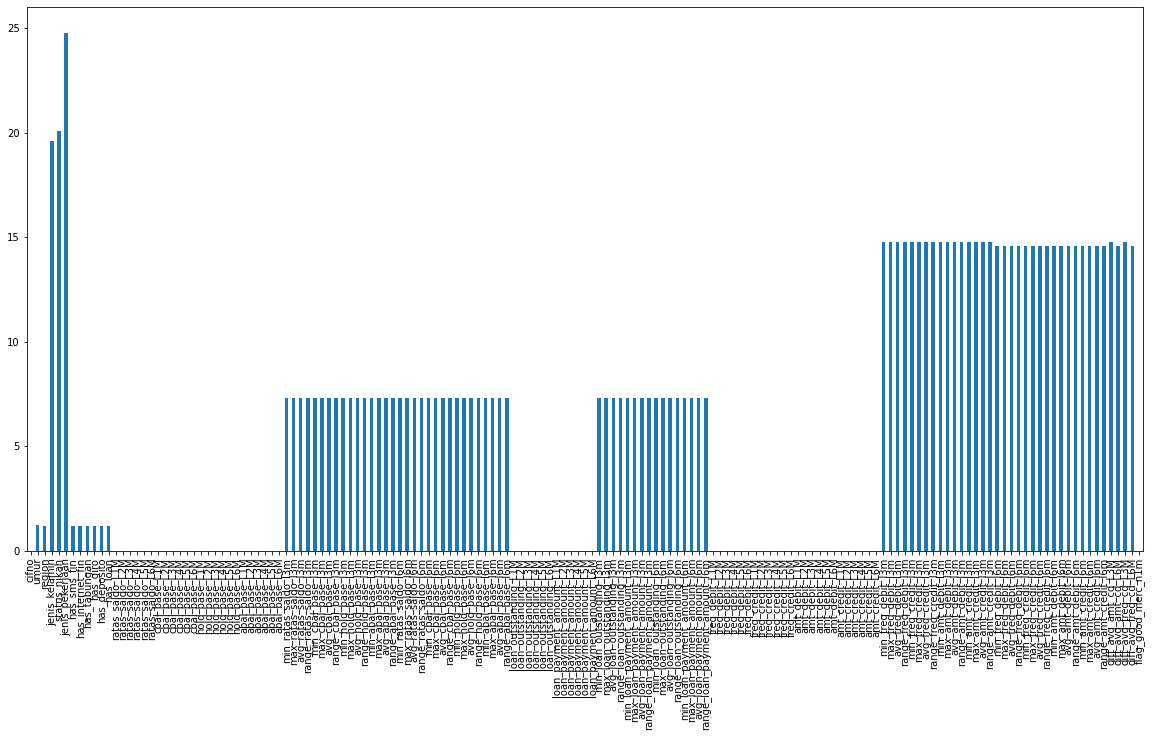

In [5]:
#Drop fitur dengan NaN lebih dari 30%
missing=df_train1.isna().sum()/df_train1.shape[0]*100
df_train1=df_train1.drop(missing[missing>30].index,axis=1)

#Drop baris dimana flag_good_merc_n1m NaN
df_train1=df_train1.dropna(subset=['flag_good_merc_n1m'])

fig,ax = plt.subplots(figsize=(20,10))
(df_train1.isna().sum()/df_train1.shape[0]*100).plot(kind='bar')

<AxesSubplot:>

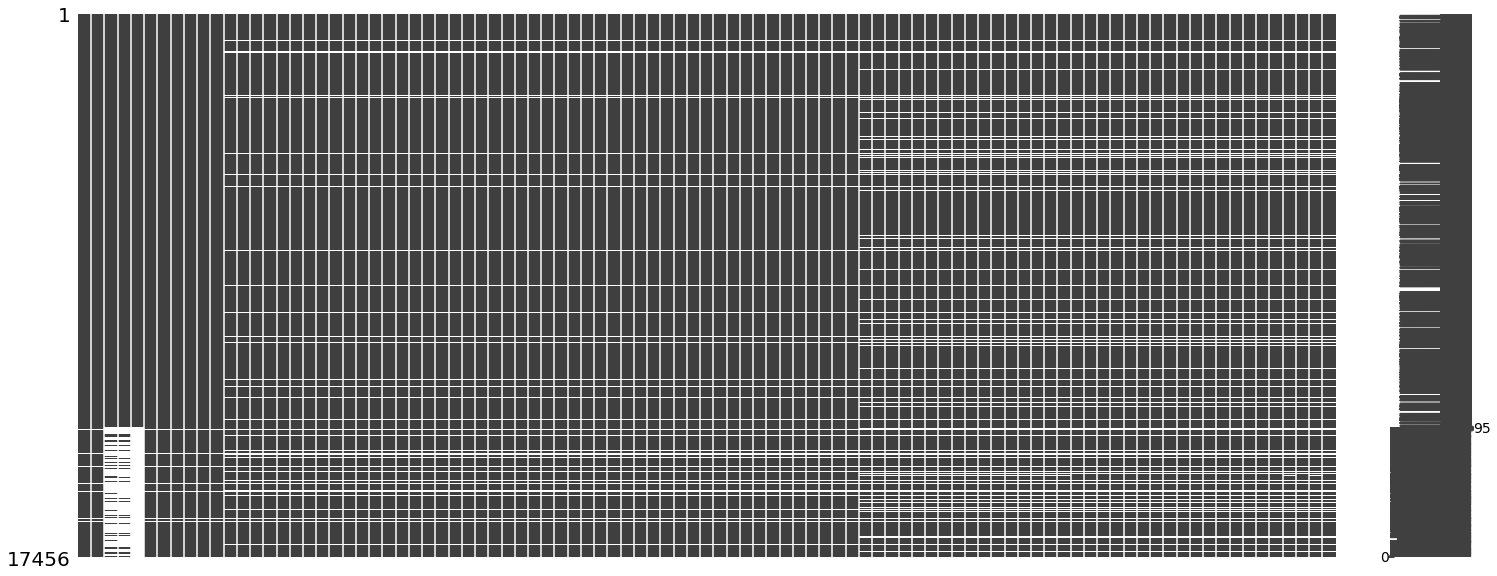

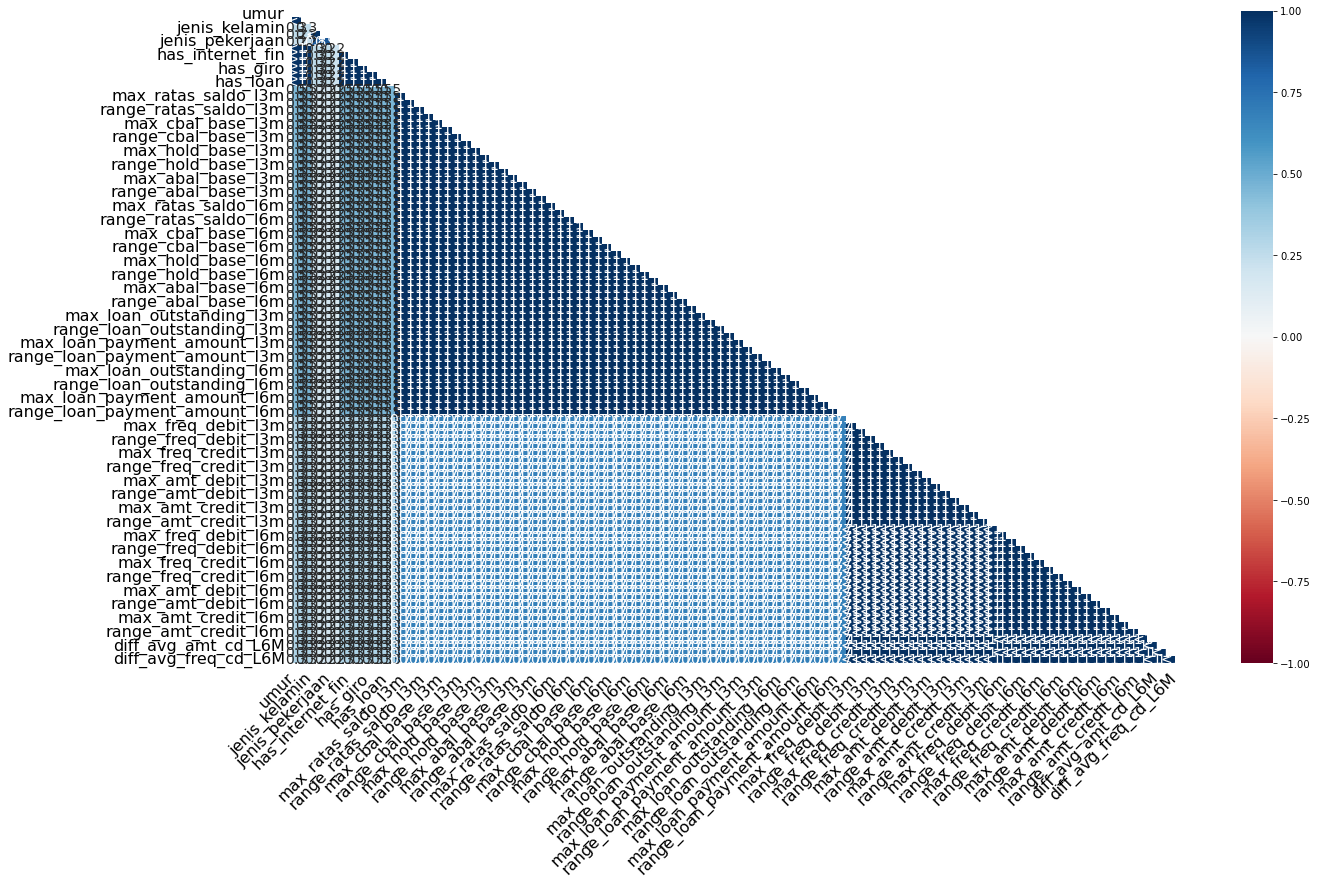

In [6]:
import missingno as msno
missing=df_train1.isna().sum()/df_train1.shape[0]*100
msno.matrix(df_train.loc[:,missing[missing>0].index].sort_values('jenis_pekerjaan'))
msno.heatmap(df_train.loc[:,missing[missing>0].index])

In [7]:
from sklearn.impute import KNNImputer

#Impute with string 'missing_value'
df_train1[['jenis_pekerjaan','jenis_kelamin','status_nikah']]=df_train1[['jenis_pekerjaan','jenis_kelamin','status_nikah']].fillna('missing_value')

#KNN Impute
missing=df_train1.isna().sum()/df_train1.shape[0]*100
col_to_impute=missing[missing>5].index

imputer=KNNImputer(n_neighbors=2)
df_train1[col_to_impute]=imputer.fit_transform(df_train1[col_to_impute])

#Mean Impute
df_train1['umur']=df_train1['umur'].fillna(np.mean(df_train1['umur']))

#Mode Impute
def mode_impute(col):
    return df_train1[col].fillna(df_train1[col].mode()[0])

df_train1['has_tabungan']=mode_impute('has_tabungan')
df_train1['region']=mode_impute('region')
df_train1['has_sms_fin']=mode_impute('has_sms_fin')
df_train1['has_giro']=mode_impute('has_giro')
df_train1['has_deposito']=mode_impute('has_deposito')
df_train1['has_loan']=mode_impute('has_loan')
df_train1['has_internet_fin']=mode_impute('has_internet_fin')

# Exploratory Data Analysis

C:\Users\imann\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


flag_good_merc_n1m,0.0,1.0,woe,iv
jenis_pekerjaan,,,,
Administrasi Umum / Supervisor,0.000840,0.000526,-0.468917,inf
Akunting / Keuangan,0.000140,0.000701,1.610524,inf
Dokter,0.009385,0.007011,-0.291583,inf
Executive / Managerial,0.000280,0.000351,0.224230,inf
Ibu Rumah Tangga,0.030677,0.024540,-0.223200,inf
Komputer-Analis/Progrmr/Internt/MIS/Engi,0.000140,0.000175,0.224230,inf
Konsultan,0.000140,0.000175,0.224230,inf
Mahasiswa Diploma / S1 / S2,0.017790,0.017528,-0.014787,inf
Militer (POLRI),0.001681,0.001578,-0.063452,inf


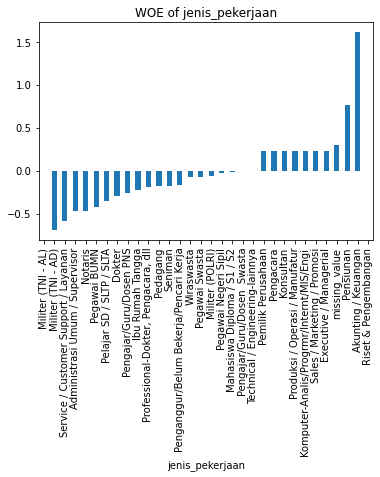

flag_good_merc_n1m,0.0,1.0,good_ratio
jenis_pekerjaan,,,
Riset & Pengembangan,0.0,1.0,100.000000
Akunting / Keuangan,1.0,4.0,80.000000
Pensiunan,7.0,12.0,63.157895
missing_value,1531.0,1650.0,51.870481
Produksi / Operasi / Manufatur,1.0,1.0,50.000000
Executive / Managerial,2.0,2.0,50.000000
Komputer-Analis/Progrmr/Internt/MIS/Engi,1.0,1.0,50.000000
Konsultan,1.0,1.0,50.000000
Pengacara,1.0,1.0,50.000000


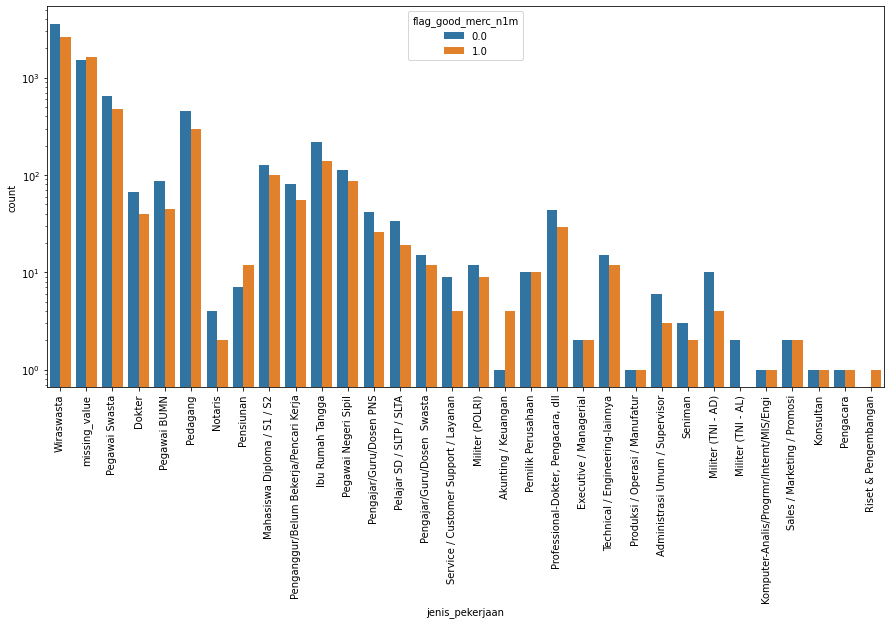

In [8]:
feature,target = 'jenis_pekerjaan','flag_good_merc_n1m'
df_woe_iv = (pd.crosstab(df_train1[feature],df_train1[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
display(df_woe_iv)
df_woe_iv['woe'].sort_values().plot(kind='bar')
plt.title('WOE of jenis_pekerjaan')
plt.show()


def create_summary(col):
    new_df=pd.DataFrame(df_train1.groupby(col)['flag_good_merc_n1m'].value_counts().sort_values())
    new_df.columns=['values']
    new_df=pd.pivot_table(new_df,index=[col],columns=['flag_good_merc_n1m'],values='values').fillna(0)
    new_df['good_ratio']=new_df[1.0]/(new_df[1.0]+new_df[0.0])*100
    return new_df

display(create_summary('jenis_pekerjaan').sort_values('good_ratio',ascending=False))
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(x='jenis_pekerjaan',data=df_train1,hue='flag_good_merc_n1m',ax=ax)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

flag_good_merc_n1m,0.0,1.0,woe,iv
status_nikah,,,,
B,0.172853,0.171954,-0.005214,0.047305
D,0.002942,0.004382,0.398583,0.047305
J,0.011066,0.010692,-0.034344,0.047305
K,0.649811,0.565469,-0.139026,0.047305
missing_value,0.163328,0.247502,0.415658,0.047305


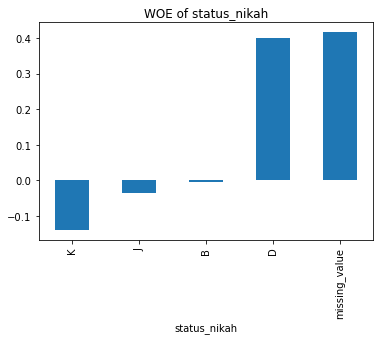

flag_good_merc_n1m,0.0,1.0,good_ratio
status_nikah,,,
missing_value,1166,1412,54.771140
D,21,25,54.347826
B,1234,981,44.288939
J,79,61,43.571429
K,4639,3226,41.017165


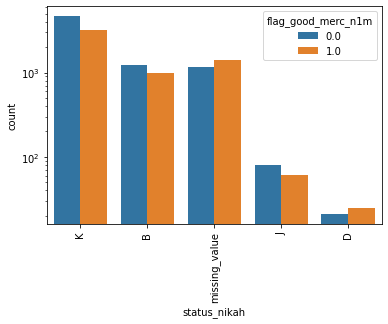

In [9]:
feature,target = 'status_nikah','flag_good_merc_n1m'
df_woe_iv = (pd.crosstab(df_train1[feature],df_train1[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
display(df_woe_iv)
df_woe_iv['woe'].sort_values().plot(kind='bar')
plt.title('WOE of status_nikah')
plt.show()

display(create_summary('status_nikah').sort_values('good_ratio',ascending=False))
sns.countplot(x='status_nikah',data=df_train1,hue='flag_good_merc_n1m')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

flag_good_merc_n1m,0.0,1.0,woe,iv
jenis_kelamin,,,,
F,0.338143,0.292375,-0.145430,0.04511
M,0.502872,0.464855,-0.078608,0.04511
missing_value,0.158986,0.242770,0.423297,0.04511


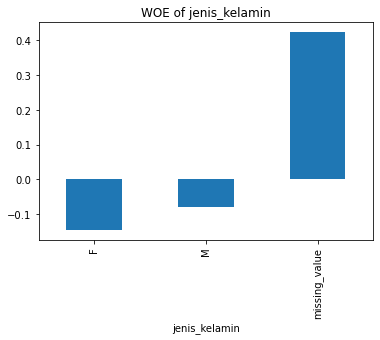

flag_good_merc_n1m,0.0,1.0,good_ratio
jenis_kelamin,,,
missing_value,1135,1385,54.960317
M,3590,2652,42.486383
F,2414,1668,40.862322


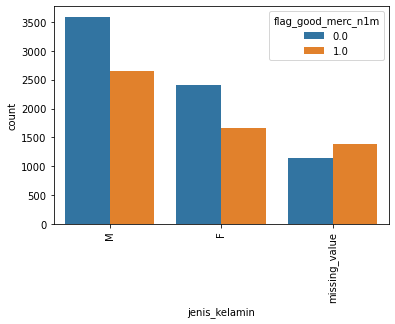

In [10]:
feature,target = 'jenis_kelamin','flag_good_merc_n1m'
df_woe_iv = (pd.crosstab(df_train1[feature],df_train1[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
display(df_woe_iv)
df_woe_iv['woe'].sort_values().plot(kind='bar')
plt.title('WOE of jenis_kelamin')
plt.show()

display(create_summary('jenis_kelamin').sort_values('good_ratio',ascending=False))
sns.countplot(x='jenis_kelamin',data=df_train1,hue='flag_good_merc_n1m')
plt.xticks(rotation=90)
plt.show()

flag_good_merc_n1m,0.0,1.0,woe,iv
has_tabungan,,,,
0.0,0.105897,0.159509,0.409633,0.025276
1.0,0.894103,0.840491,-0.061835,0.025276


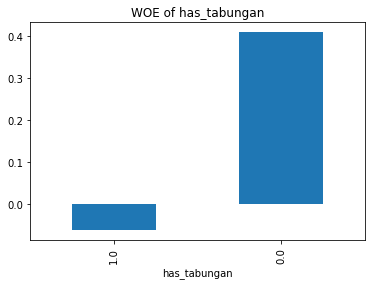

flag_good_merc_n1m,0.0,1.0,good_ratio
has_tabungan,,,
0.0,756,910,54.621849
1.0,6383,4795,42.896761


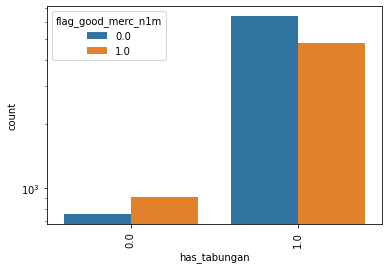

In [11]:
feature,target = 'has_tabungan','flag_good_merc_n1m'
df_woe_iv = (pd.crosstab(df_train1[feature],df_train1[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
display(df_woe_iv)
df_woe_iv['woe'].sort_values().plot(kind='bar')
plt.title('WOE of has_tabungan')
plt.show()

display(create_summary('has_tabungan').sort_values('good_ratio',ascending=False))
sns.countplot(x='has_tabungan',data=df_train1,hue='flag_good_merc_n1m')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

flag_good_merc_n1m,0.0,1.0,woe,iv
region,,,,
B,0.127189,0.034181,-1.314015,0.305953
C,0.031937,0.028046,-0.129942,0.305953
D,0.034739,0.032778,-0.058090,0.305953
E,0.044404,0.051884,0.155687,0.305953
F,0.111360,0.102542,-0.082501,0.305953
G,0.028856,0.093602,1.176749,0.305953
H,0.097353,0.058896,-0.502571,0.305953
I,0.084466,0.076599,-0.097754,0.305953
J,0.013587,0.026468,0.666799,0.305953


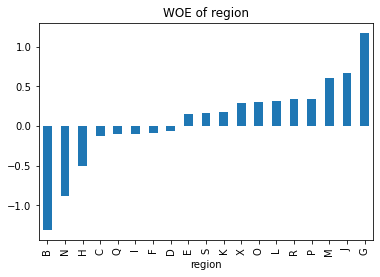

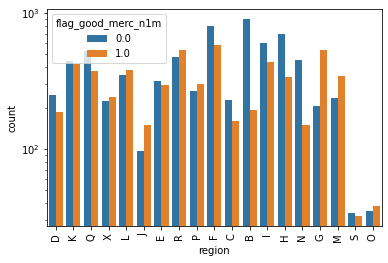

In [12]:
feature,target = 'region','flag_good_merc_n1m'
df_woe_iv = (pd.crosstab(df_train1[feature],df_train1[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
display(df_woe_iv)
df_woe_iv['woe'].sort_values().plot(kind='bar')
plt.title('WOE of region')
plt.show()


sns.countplot(x='region',data=df_train1,hue='flag_good_merc_n1m')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

flag_good_merc_n1m,0.0,1.0,woe,iv
has_giro,,,,
0.0,0.75893,0.690272,-0.094824,0.023717
1.0,0.24107,0.309728,0.250607,0.023717


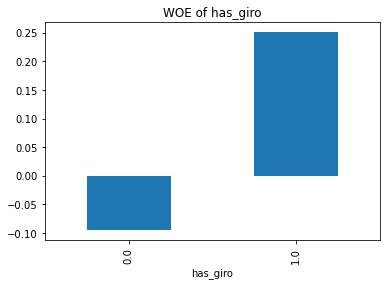

flag_good_merc_n1m,0.0,1.0,good_ratio
has_giro,,,
1.0,1721,1767,50.659404
0.0,5418,3938,42.090637


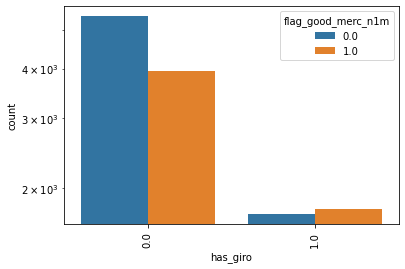

In [35]:
feature,target = 'has_giro','flag_good_merc_n1m'
df_woe_iv = (pd.crosstab(df_train1[feature],df_train1[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
display(df_woe_iv)
df_woe_iv['woe'].sort_values().plot(kind='bar')
plt.title('WOE of has_giro')
plt.show()


display(create_summary('has_giro').sort_values('good_ratio',ascending=False))
sns.countplot(x='has_giro',data=df_train1,hue='flag_good_merc_n1m')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

flag_good_merc_n1m,0.0,1.0,woe,iv
has_sms_fin,,,,
0.0,0.675165,0.697108,0.031984,0.002237
1.0,0.324835,0.302892,-0.069942,0.002237


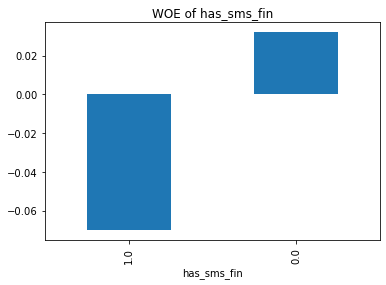

flag_good_merc_n1m,0.0,1.0,good_ratio
has_sms_fin,,,
0.0,4820,3977,45.208594
1.0,2319,1728,42.698295


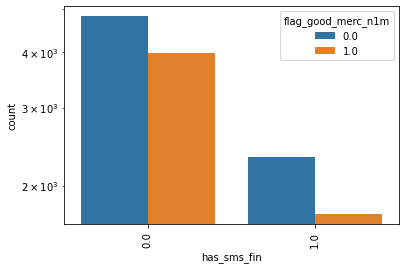

In [36]:
feature,target = 'has_sms_fin','flag_good_merc_n1m'
df_woe_iv = (pd.crosstab(df_train1[feature],df_train1[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
display(df_woe_iv)
df_woe_iv['woe'].sort_values().plot(kind='bar')
plt.title('WOE of has_sms_fin')
plt.show()

display(create_summary('has_sms_fin').sort_values('good_ratio',ascending=False))
sns.countplot(x='has_sms_fin',data=df_train1,hue='flag_good_merc_n1m')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

flag_good_merc_n1m,0.0,1.0,woe,iv
has_deposito,,,,
0.0,0.916795,0.912708,-0.004468,0.000214
1.0,0.083205,0.087292,0.047950,0.000214


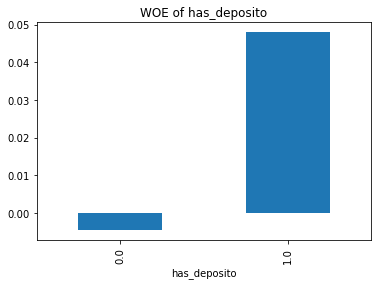

flag_good_merc_n1m,0.0,1.0,good_ratio
has_deposito,,,
1.0,594,498,45.604396
0.0,6545,5207,44.307352


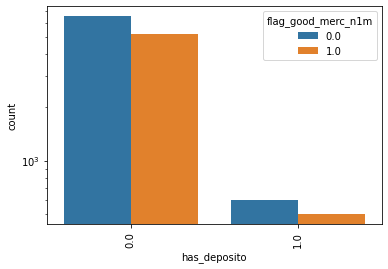

In [37]:
feature,target = 'has_deposito','flag_good_merc_n1m'
df_woe_iv = (pd.crosstab(df_train1[feature],df_train1[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
display(df_woe_iv)
df_woe_iv['woe'].sort_values().plot(kind='bar')
plt.title('WOE of has_deposito')
plt.show()

display(create_summary('has_deposito').sort_values('good_ratio',ascending=False))
sns.countplot(x='has_deposito',data=df_train1,hue='flag_good_merc_n1m')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

flag_good_merc_n1m,0.0,1.0,woe,iv
has_loan,,,,
0.0,0.752486,0.819807,0.085686,0.027139
1.0,0.247514,0.180193,-0.317438,0.027139


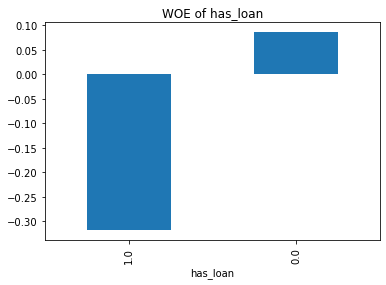

flag_good_merc_n1m,0.0,1.0,good_ratio
has_loan,,,
0.0,5372,4677,46.541944
1.0,1767,1028,36.779964


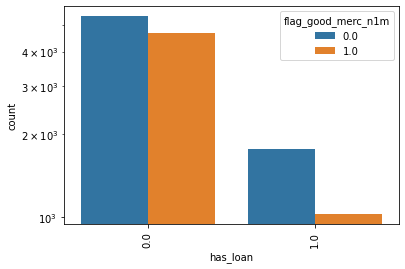

In [38]:
feature,target = 'has_loan','flag_good_merc_n1m'
df_woe_iv = (pd.crosstab(df_train1[feature],df_train1[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
display(df_woe_iv)
df_woe_iv['woe'].sort_values().plot(kind='bar')
plt.title('WOE of has_loan')
plt.show()


display(create_summary('has_loan').sort_values('good_ratio',ascending=False))
sns.countplot(x='has_loan',data=df_train1,hue='flag_good_merc_n1m')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

flag_good_merc_n1m,0.0,1.0,woe,iv
has_internet_fin,,,,
0.0,0.414064,0.398598,-0.038067,0.000992
1.0,0.585936,0.601402,0.026053,0.000992


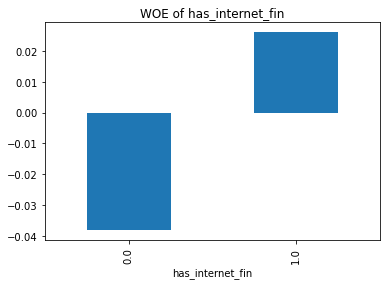

flag_good_merc_n1m,0.0,1.0,good_ratio
has_internet_fin,,,
1.0,4183,3431,45.061728
0.0,2956,2274,43.479924


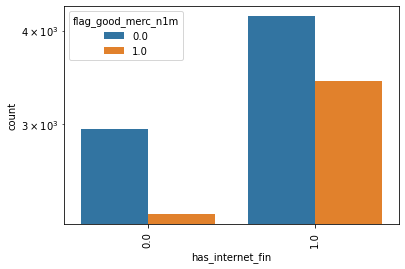

In [39]:
feature,target = 'has_internet_fin','flag_good_merc_n1m'
df_woe_iv = (pd.crosstab(df_train1[feature],df_train1[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
display(df_woe_iv)
df_woe_iv['woe'].sort_values().plot(kind='bar')
plt.title('WOE of has_internet_fin')
plt.show()

display(create_summary('has_internet_fin').sort_values('good_ratio',ascending=False))
sns.countplot(x='has_internet_fin',data=df_train1,hue='flag_good_merc_n1m')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [18]:
df_train2=df_train1.drop(['has_sms_fin','has_deposito','has_internet_fin'],axis=1)
df_train2

,cifno,umur,region,jenis_kelamin,status_nikah,jenis_pekerjaan,has_tabungan,has_giro,has_loan,ratas_saldo_L1M,...,range_amt_debit_l6m,min_amt_credit_l6m,max_amt_credit_l6m,avg_amt_credit_l6m,range_amt_credit_l6m,diff_avg_amt_cd_L3M,diff_avg_amt_cd_L6M,diff_avg_freq_cd_L3M,diff_avg_freq_cd_L6M,flag_good_merc_n1m
0,AAHN915,26.0,D,M,K,Wiraswasta,1.0,0.0,1.0,8.753522e+07,...,2.834859e+07,1.169314e+07,2.195160e+07,1.573673e+07,1.025846e+07,532800.0,8508789.0,42.0,42.0,1.0
1,ACGR477,34.0,K,M,K,Wiraswasta,1.0,0.0,0.0,7.837118e+07,...,2.094265e+06,4.192115e+06,3.880544e+07,2.149878e+07,3.461333e+07,20435223.0,20435223.0,2.0,2.0,0.0
2,AMN3609,32.0,Q,F,K,Wiraswasta,1.0,1.0,1.0,2.232424e+07,...,1.114391e+08,2.162291e+07,1.063070e+08,6.234655e+07,8.468406e+07,27443925.0,9490625.0,38.0,49.0,1.0
3,AP83081,44.0,X,M,B,missing_value,1.0,0.0,0.0,1.816450e+07,...,4.705807e+07,5.165000e+03,3.250316e+07,1.042519e+07,3.249800e+07,4451726.0,4076179.0,16.0,15.0,1.0
4,AQLS720,37.0,L,M,K,Wiraswasta,1.0,0.0,0.0,5.230000e+05,...,0.000000e+00,1.000000e+06,1.000000e+06,1.000000e+06,0.000000e+00,987500.0,987500.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17449,SUDZ841,27.0,R,F,K,Wiraswasta,1.0,0.0,0.0,6.345014e+05,...,8.607486e+07,0.000000e+00,8.770830e+07,3.843314e+07,8.770830e+07,2754161.0,1129841.0,14.0,14.0,1.0
17450,TDD1663,65.0,H,M,K,missing_value,1.0,0.0,0.0,2.301776e+05,...,1.185400e+07,1.457113e+06,1.250600e+07,7.490910e+06,1.104888e+07,29677.0,191107.0,6.0,7.0,0.0
17451,TJP6131,38.0,L,M,K,Wiraswasta,1.0,0.0,0.0,6.400000e+04,...,5.000000e+02,0.000000e+00,1.000000e+05,3.333333e+04,1.000000e+05,18167.0,18167.0,2.0,2.0,1.0
17454,U978189,46.0,M,M,K,Wiraswasta,0.0,1.0,0.0,7.600490e+08,...,5.280626e+09,1.405392e+09,8.537942e+09,4.799192e+09,7.132550e+09,573270072.0,52945750.0,13.0,44.0,1.0


In [19]:
#Numerical Col
df_train3=df_train2.loc[:,'ratas_saldo_L1M':]
df_train3

,ratas_saldo_L1M,ratas_saldo_L2M,ratas_saldo_L3M,ratas_saldo_L4M,ratas_saldo_L5M,ratas_saldo_L6M,cbal_base_L1M,cbal_base_L2M,cbal_base_L3M,cbal_base_L4M,...,range_amt_debit_l6m,min_amt_credit_l6m,max_amt_credit_l6m,avg_amt_credit_l6m,range_amt_credit_l6m,diff_avg_amt_cd_L3M,diff_avg_amt_cd_L6M,diff_avg_freq_cd_L3M,diff_avg_freq_cd_L6M,flag_good_merc_n1m
0,8.753522e+07,7.918518e+07,6.912244e+07,8.165052e+07,6.193400e+07,4.730996e+07,8.855241e+07,8.563986e+07,7.331172e+07,9.015081e+07,...,2.834859e+07,1.169314e+07,2.195160e+07,1.573673e+07,1.025846e+07,532800.0,8508789.0,42.0,42.0,1.0
1,7.837118e+07,6.382261e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.072519e+07,7.654949e+07,0.000000e+00,0.000000e+00,...,2.094265e+06,4.192115e+06,3.880544e+07,2.149878e+07,3.461333e+07,20435223.0,20435223.0,2.0,2.0,0.0
2,2.232424e+07,6.193626e+07,8.031988e+07,7.355951e+07,4.439426e+07,5.782396e+07,1.523712e+07,2.302907e+07,7.686344e+07,9.756889e+07,...,1.114391e+08,2.162291e+07,1.063070e+08,6.234655e+07,8.468406e+07,27443925.0,9490625.0,38.0,49.0,1.0
3,1.816450e+07,1.021418e+07,1.074583e+07,1.565206e+07,2.348300e+07,4.799454e+07,2.411470e+07,9.499166e+06,9.882150e+06,1.175702e+07,...,4.705807e+07,5.165000e+03,3.250316e+07,1.042519e+07,3.249800e+07,4451726.0,4076179.0,16.0,15.0,1.0
4,5.230000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.875000e+05,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+06,1.000000e+06,1.000000e+06,0.000000e+00,987500.0,987500.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17449,6.345014e+05,1.176640e+06,9.919601e+05,5.029663e+06,8.588698e+05,3.519994e+05,7.619440e+04,1.255374e+05,1.744894e+05,1.852678e+06,...,8.607486e+07,0.000000e+00,8.770830e+07,3.843314e+07,8.770830e+07,2754161.0,1129841.0,14.0,14.0,1.0
17450,2.301776e+05,3.200378e+05,4.790523e+05,3.020090e+05,9.609481e+05,1.474071e+06,1.963850e+05,2.047720e+05,2.635880e+05,2.854160e+05,...,1.185400e+07,1.457113e+06,1.250600e+07,7.490910e+06,1.104888e+07,29677.0,191107.0,6.0,7.0,0.0
17451,6.400000e+04,7.869354e+04,8.700000e+04,0.000000e+00,0.000000e+00,0.000000e+00,5.450000e+04,6.950000e+04,8.450000e+04,0.000000e+00,...,5.000000e+02,0.000000e+00,1.000000e+05,3.333333e+04,1.000000e+05,18167.0,18167.0,2.0,2.0,1.0
17454,7.600490e+08,6.206634e+08,1.170987e+09,1.683806e+09,9.799351e+08,8.240414e+08,2.157523e+08,1.205850e+09,2.155182e+09,1.935563e+09,...,5.280626e+09,1.405392e+09,8.537942e+09,4.799192e+09,7.132550e+09,573270072.0,52945750.0,13.0,44.0,1.0


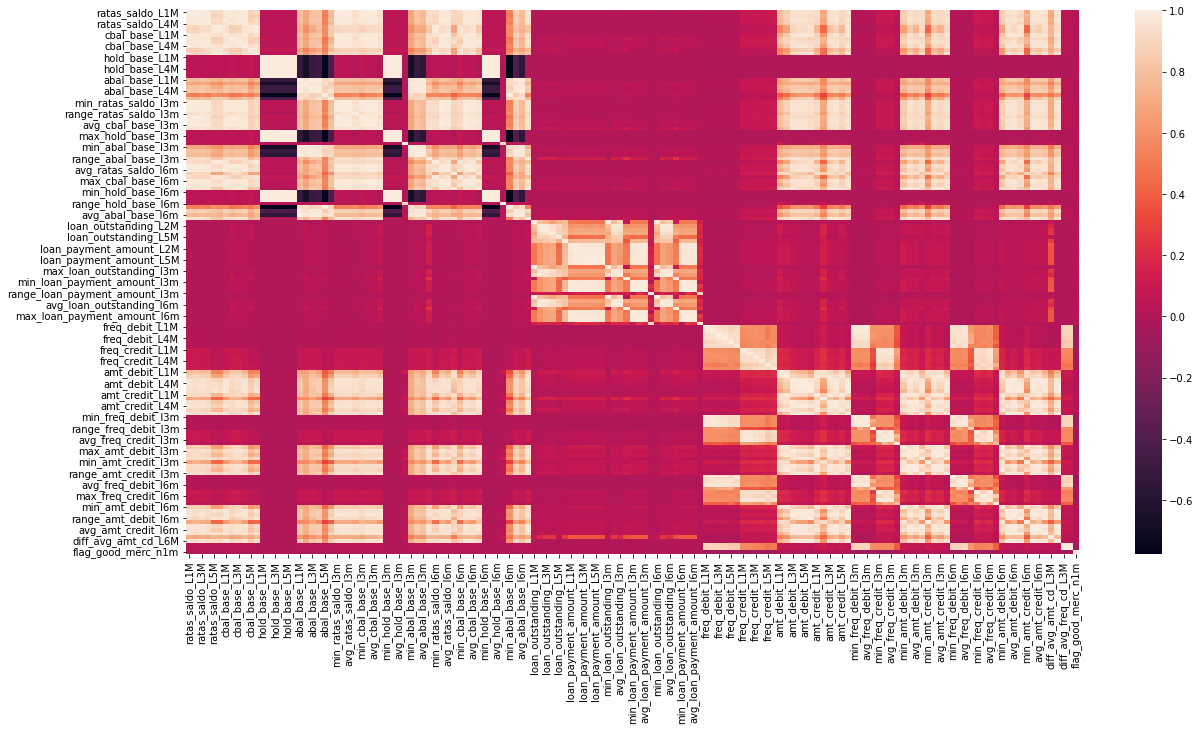

In [20]:
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(df_train3.corr())
plt.show()

,ratas_saldo_L1M,hold_base_L1M,range_hold_base_l3m,loan_outstanding_L1M,range_loan_outstanding_l3m,range_loan_payment_amount_l3m,freq_debit_L1M,freq_credit_L1M,flag_good_merc_n1m
0,87535220.10,0.0,0.0,0.0,0.0,0.0,13,60,1.0
1,78371180.89,0.0,0.0,0.0,0.0,0.0,1,3,0.0
2,22324238.00,100150000.0,0.0,2778069.0,2777741.0,0.0,60,29,1.0
3,18164499.57,0.0,0.0,0.0,0.0,0.0,35,9,1.0
4,523000.00,0.0,0.0,0.0,0.0,0.0,2,1,1.0


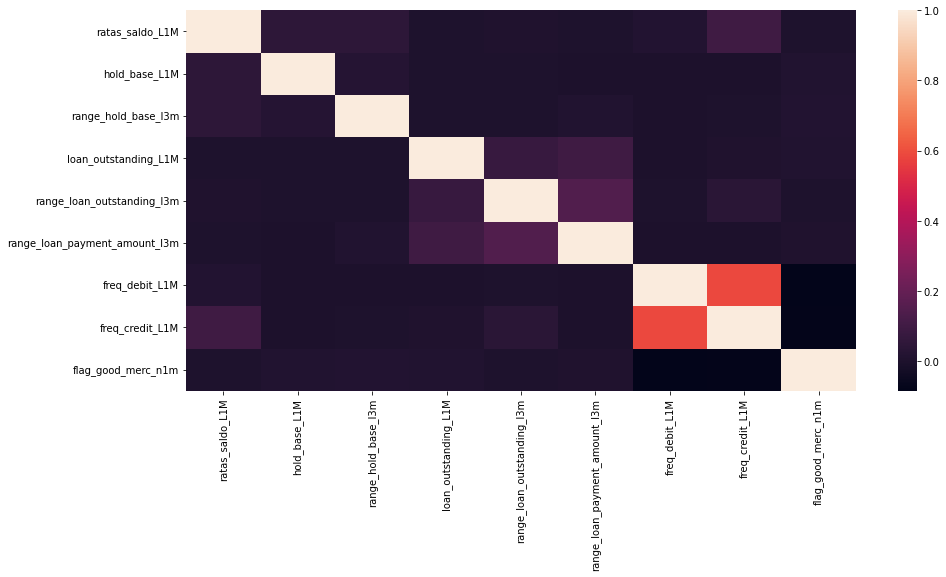

In [21]:
def korelasi(data,threshold):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

df_train4=df_train3.drop(korelasi(df_train3.drop('flag_good_merc_n1m',axis=1),0.7),axis=1)
display(df_train4.head())
fig,ax=plt.subplots(figsize=(15,7))
sns.heatmap(df_train4.corr())
plt.show()

In [22]:
correlation_to_target=df_train4.corr().loc['flag_good_merc_n1m']
df_train5=df_train4.drop(correlation_to_target[correlation_to_target<0.01].index,axis=1)
df_train5

,hold_base_L1M,range_hold_base_l3m,flag_good_merc_n1m
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,100150000.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
17449,0.0,0.0,1.0
17450,0.0,0.0,0.0
17451,0.0,0.0,1.0
17454,0.0,0.0,1.0


In [23]:
df_train_final=pd.concat([df_train2.loc[:,:'has_loan'],df_train5],axis=1).set_index('cifno')
df_train_final

,umur,region,jenis_kelamin,status_nikah,jenis_pekerjaan,has_tabungan,has_giro,has_loan,hold_base_L1M,range_hold_base_l3m,flag_good_merc_n1m
cifno,,,,,,,,,,,
AAHN915,26.0,D,M,K,Wiraswasta,1.0,0.0,1.0,0.0,0.0,1.0
ACGR477,34.0,K,M,K,Wiraswasta,1.0,0.0,0.0,0.0,0.0,0.0
AMN3609,32.0,Q,F,K,Wiraswasta,1.0,1.0,1.0,100150000.0,0.0,1.0
AP83081,44.0,X,M,B,missing_value,1.0,0.0,0.0,0.0,0.0,1.0
AQLS720,37.0,L,M,K,Wiraswasta,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
SUDZ841,27.0,R,F,K,Wiraswasta,1.0,0.0,0.0,0.0,0.0,1.0
TDD1663,65.0,H,M,K,missing_value,1.0,0.0,0.0,0.0,0.0,0.0
TJP6131,38.0,L,M,K,Wiraswasta,1.0,0.0,0.0,0.0,0.0,1.0


In [24]:
df_train_final1=pd.get_dummies(df_train_final,drop_first=True)

In [44]:
X=df_train_final1.drop('flag_good_merc_n1m',axis=1)
y=df_train_final1[['flag_good_merc_n1m']]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [47]:
#Model 1: XGBoost
import xgboost as xgb
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV


#Menginisiasi Model
model_12xgb = xgb.XGBClassifier(objective ='binary:logistic', n_estimators = 100,
                                use_label_encoder=False,eval_metric='mlogloss')


model_12xgb.fit(X_train,y_train)

#Melakukan Prediksi
proba12xgb=model_12xgb.predict_proba(X_test)[:,1]
pred12xgb=model_12xgb.predict(X_test)

#Evaluasi Model
TN12, FP12, FN12, TP12 = confusion_matrix(y_test,pred12xgb).ravel()


def cm_score(tn,fp,fn,tp):
    tpr=tp/(tp+fn)
    tnr=tn/(tn+fp)
    ppv=tp/(tp+fp)
    npv=tn/(tn+fn)
    fpr=fp/(fp+tn)
    fnr=fn/(tp+fn)
    fdr=fp/(tp+fp)
    return tpr,tnr,ppv,npv,fpr,fnr,fdr

TPR,TNR,PPV,NPV,FPR,FNR,FDR=cm_score(TN12, FP12, FN12, TP12)

print('True Negative:',TN12)
print('False Positive:',FP12)
print('False Negative:',FN12)
print('True Positive:',TP12)
print('Recall:',TPR)
print('False Positive Rate:',FPR)
print('Precision:',PPV)
print('True Positive Rate:',TPR)
print('Specificity:',TNR)

auc_score_train12xgb=roc_auc_score(y_train,model_12xgb.predict_proba(X_train)[:,1])
auc_score_test12xgb=roc_auc_score(y_test,proba12xgb)

print('AUC Score training data:',auc_score_train12xgb)
print('AUC Score test data:',auc_score_test12xgb)

cv12=cross_val_score(model_12xgb,X_test,y_test,cv=5)
print('AUC Score Cross-Validation:',cv12.mean())
print('Accuracy:',accuracy_score(y_test,pred12xgb))

True Negative: 1556
False Positive: 595
False Negative: 912
True Positive: 791
Recall: 0.4644744568408691
False Positive Rate: 0.2766155276615528
Precision: 0.5707070707070707
True Positive Rate: 0.4644744568408691
Specificity: 0.7233844723384473
AUC Score training data: 0.8297119734038354
AUC Score test data: 0.6472432355405302
AUC Score Cross-Validation: 0.602753044620749
Accuracy: 0.6089776855215361


In [48]:
#Parameter yang akan di tuning
param_grid={"max_depth": [3,4,5,6],
            "learning_rate":np.linspace(0.01,0.05,5),
           'num_parallel_tree':[1,2]}

#Pelaksanaan Tuning
gs12=GridSearchCV(model_12xgb, param_grid, cv=10,scoring='accuracy')
gs12.fit(X_train,y_train)
print("Tuned Parameters: {}".format(gs12.best_params_))

Tuned Parameters: {'learning_rate': 0.03, 'max_depth': 4, 'num_parallel_tree': 1}


In [49]:
#Model 1: XGBoost
import xgboost as xgb
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV


#Menginisiasi Model
model_12xgb = xgb.XGBClassifier(objective ='binary:logistic', n_estimators = 100,
                                use_label_encoder=False,learning_rate=0.03,
                                base_score=0.5,max_depth=4,eval_metric='mlogloss')


model_12xgb.fit(X_train,y_train)

#Melakukan Prediksi
proba12xgb=model_12xgb.predict_proba(X_test)[:,1]
pred12xgb=model_12xgb.predict(X_test)

#Evaluasi Model
TN12, FP12, FN12, TP12 = confusion_matrix(y_test,pred12xgb).ravel()


def cm_score(tn,fp,fn,tp):
    tpr=tp/(tp+fn)
    tnr=tn/(tn+fp)
    ppv=tp/(tp+fp)
    npv=tn/(tn+fn)
    fpr=fp/(fp+tn)
    fnr=fn/(tp+fn)
    fdr=fp/(tp+fp)
    return tpr,tnr,ppv,npv,fpr,fnr,fdr

TPR,TNR,PPV,NPV,FPR,FNR,FDR=cm_score(TN12, FP12, FN12, TP12)

print('True Negative:',TN12)
print('False Positive:',FP12)
print('False Negative:',FN12)
print('True Positive:',TP12)
print('Recall:',TPR)
print('False Positive Rate:',FPR)
print('Precision:',PPV)
print('True Positive Rate:',TPR)
print('Specificity:',TNR)

auc_score_train12xgb=roc_auc_score(y_train,model_12xgb.predict_proba(X_train)[:,1])
auc_score_test12xgb=roc_auc_score(y_test,proba12xgb)

print('AUC Score training data:',auc_score_train12xgb)
print('AUC Score test data:',auc_score_test12xgb)

cv12=cross_val_score(model_12xgb,X_test,y_test,cv=5)
print('AUC Score Cross-Validation:',cv12.mean())
print('Accuracy:',accuracy_score(y_test,pred12xgb))

True Negative: 1770
False Positive: 381
False Negative: 1154
True Positive: 549
Recall: 0.32237228420434527
False Positive Rate: 0.17712691771269176
Precision: 0.5903225806451613
True Positive Rate: 0.32237228420434527
Specificity: 0.8228730822873083
AUC Score training data: 0.6754694775707576
AUC Score test data: 0.647083537051278
AUC Score Cross-Validation: 0.6053470783431874
Accuracy: 0.601712506486767


In [29]:
df_train

,cifno,umur,region,jenis_kelamin,pendidikan,status_nikah,jenis_pekerjaan,omset_per_bulan,sumber_penghasilan,penghasilan_per_bulan,...,flag_good_merc_n5m,flag_good_merc_n6m,flag_good_merc_n7m,flag_good_merc_n8m,flag_good_merc_n9m,flag_good_merc_n10m,flag_good_merc_n11m,flag_good_merc_n12m,modified_date,ds
0,AAHN915,26.0,D,M,NaN,K,Wiraswasta,NaN,NaN,NaN,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2021-08-20T14:17:50.745Z,202108
1,ACGR477,34.0,K,M,NaN,K,Wiraswasta,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2021-08-20T14:17:50.745Z,202108
2,AMN3609,32.0,Q,F,NaN,K,Wiraswasta,NaN,NaN,NaN,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2021-08-20T14:17:50.745Z,202108
3,AP83081,44.0,X,M,NaN,B,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,2021-08-20T14:17:50.745Z,202108
4,AQLS720,37.0,L,M,NaN,K,Wiraswasta,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,2021-08-20T14:17:50.745Z,202108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17451,TJP6131,38.0,L,M,NaN,K,Wiraswasta,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2021-08-20T14:17:50.745Z,202108
17452,U771095,50.0,H,F,NaN,K,Wiraswasta,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-20T14:17:50.745Z,202108
17453,U899498,45.0,I,F,NaN,K,Wiraswasta,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-20T14:17:50.745Z,202108
17454,U978189,46.0,M,M,NaN,K,Wiraswasta,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2021-08-20T14:17:50.745Z,202108


In [30]:
df_vintage=df_train.set_index('cifno').loc[:,'flag_good_merc_n1m':'flag_good_merc_n12m']
df_vintage=df_vintage.dropna(how='all')
df_vintage

,flag_good_merc_n1m,flag_good_merc_n2m,flag_good_merc_n3m,flag_good_merc_n4m,flag_good_merc_n5m,flag_good_merc_n6m,flag_good_merc_n7m,flag_good_merc_n8m,flag_good_merc_n9m,flag_good_merc_n10m,flag_good_merc_n11m,flag_good_merc_n12m
cifno,,,,,,,,,,,,
AAHN915,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACGR477,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AMN3609,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
AP83081,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN
AQLS720,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
SUDZ841,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
TDD1663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
TJP6131,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN


In [31]:
start_12=df_vintage[df_vintage['flag_good_merc_n12m'].notna()]
df_vintage11=df_vintage.drop(start_12.index,axis=0).drop('flag_good_merc_n12m',axis=1)
start_11=df_vintage11[df_vintage11['flag_good_merc_n11m'].notna()]
df_vintage10=df_vintage11.drop(start_11.index,axis=0).drop('flag_good_merc_n11m',axis=1)
start_10=df_vintage10[df_vintage10['flag_good_merc_n10m'].notna()]
df_vintage9=df_vintage10.drop(start_10.index,axis=0).drop('flag_good_merc_n10m',axis=1)
start_9=df_vintage9[df_vintage9['flag_good_merc_n9m'].notna()]
df_vintage8=df_vintage9.drop(start_9.index,axis=0).drop('flag_good_merc_n9m',axis=1)
start_8=df_vintage8[df_vintage8['flag_good_merc_n8m'].notna()]
df_vintage7=df_vintage8.drop(start_8.index,axis=0).drop('flag_good_merc_n8m',axis=1)
start_7=df_vintage7[df_vintage7['flag_good_merc_n7m'].notna()]
df_vintage6=df_vintage7.drop(start_7.index,axis=0).drop('flag_good_merc_n7m',axis=1)
start_6=df_vintage6[df_vintage6['flag_good_merc_n6m'].notna()]
df_vintage5=df_vintage6.drop(start_6.index,axis=0).drop('flag_good_merc_n6m',axis=1)
start_5=df_vintage5[df_vintage5['flag_good_merc_n5m'].notna()]
df_vintage4=df_vintage5.drop(start_5.index,axis=0).drop('flag_good_merc_n5m',axis=1)
start_4=df_vintage4[df_vintage4['flag_good_merc_n4m'].notna()]
df_vintage3=df_vintage4.drop(start_4.index,axis=0).drop('flag_good_merc_n4m',axis=1)
start_3=df_vintage3[df_vintage3['flag_good_merc_n3m'].notna()]
df_vintage2=df_vintage3.drop(start_3.index,axis=0).drop('flag_good_merc_n3m',axis=1)
start_2=df_vintage2[df_vintage2['flag_good_merc_n2m'].notna()]
df_vintage1=df_vintage2.drop(start_2.index,axis=0).drop('flag_good_merc_n2m',axis=1)
start_1=df_vintage1[df_vintage1['flag_good_merc_n1m'].notna()]

start_12.columns=['12','11','10','9','8','7','6','5','4','3','2','1']
start_11.columns=['11','10','9','8','7','6','5','4','3','2','1']
start_10.columns=['10','9','8','7','6','5','4','3','2','1']
start_9.columns=['9','8','7','6','5','4','3','2','1']
start_8.columns=['8','7','6','5','4','3','2','1']
start_7.columns=['7','6','5','4','3','2','1']
start_6.columns=['6','5','4','3','2','1']
start_5.columns=['5','4','3','2','1']
start_4.columns=['4','3','2','1']
start_3.columns=['3','2','1']
start_2.columns=['2','1']
start_1.columns=['1']


pd.concat([start_1,start_2,start_3,start_4,start_5,start_6,start_7,start_8,start_9,start_10,start_11,start_12])
v1=pd.DataFrame(start_12.mean(),columns=['Month_1']).transpose()
v2=pd.DataFrame(start_11.mean(),columns=['Month_2']).transpose()
v3=pd.DataFrame(start_10.mean(),columns=['Month_3']).transpose()
v4=pd.DataFrame(start_9.mean(),columns=['Month_4']).transpose()
v5=pd.DataFrame(start_8.mean(),columns=['Month_5']).transpose()
v6=pd.DataFrame(start_7.mean(),columns=['Month_6']).transpose()
v7=pd.DataFrame(start_6.mean(),columns=['Month_7']).transpose()
v8=pd.DataFrame(start_5.mean(),columns=['Month_8']).transpose()
v9=pd.DataFrame(start_4.mean(),columns=['Month_9']).transpose()
v10=pd.DataFrame(start_3.mean(),columns=['Month_10']).transpose()
v11=pd.DataFrame(start_2.mean(),columns=['Month_11']).transpose()
v12=pd.DataFrame(start_1.mean(),columns=['Month_12']).transpose()

new_df2=pd.concat([v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12])
new_df2=new_df2[new_df2.columns[::-1]]
new_df2

,1,2,3,4,5,6,7,8,9,10,11,12
Month_1,0.717718,0.755264,0.757123,0.766632,0.775395,0.779339,0.779349,0.765515,0.733618,0.694665,0.648316,0.60531
Month_2,0.570205,0.673993,0.694030,0.701493,0.725092,0.715847,0.739927,0.763636,0.736059,0.676525,0.618147,NaN
Month_3,0.569665,0.719466,0.704854,0.726755,0.716475,0.731801,0.755814,0.744762,0.697368,0.623106,NaN,NaN
Month_4,0.496112,0.625632,0.618243,0.602329,0.616667,0.611667,0.644040,0.624374,0.539344,NaN,NaN,NaN
Month_5,0.504242,0.585845,0.603518,0.612466,0.604620,0.564560,0.560876,0.538867,NaN,NaN,NaN,NaN
Month_6,0.460294,0.585925,0.585977,0.590301,0.587748,0.517529,0.471358,NaN,NaN,NaN,NaN,NaN
Month_7,0.434670,0.566282,0.565154,0.549254,0.523169,0.466954,NaN,NaN,NaN,NaN,NaN,NaN
Month_8,0.474713,0.584735,0.595300,0.560881,0.481669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month_9,0.379310,0.454196,0.450507,0.392581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month_10,0.371933,0.425581,0.388824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,1,2,3,4,5,6,7,8,9,10,11,12
Month_1,0.717718,0.755264,0.757123,0.766632,0.775395,0.779339,0.779349,0.765515,0.733618,0.694665,0.648316,0.60531
Month_2,0.570205,0.673993,0.694030,0.701493,0.725092,0.715847,0.739927,0.763636,0.736059,0.676525,0.618147,NaN
Month_3,0.569665,0.719466,0.704854,0.726755,0.716475,0.731801,0.755814,0.744762,0.697368,0.623106,NaN,NaN
Month_4,0.496112,0.625632,0.618243,0.602329,0.616667,0.611667,0.644040,0.624374,0.539344,NaN,NaN,NaN
Month_5,0.504242,0.585845,0.603518,0.612466,0.604620,0.564560,0.560876,0.538867,NaN,NaN,NaN,NaN
Month_6,0.460294,0.585925,0.585977,0.590301,0.587748,0.517529,0.471358,NaN,NaN,NaN,NaN,NaN
Month_7,0.434670,0.566282,0.565154,0.549254,0.523169,0.466954,NaN,NaN,NaN,NaN,NaN,NaN
Month_8,0.474713,0.584735,0.595300,0.560881,0.481669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month_9,0.379310,0.454196,0.450507,0.392581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month_10,0.371933,0.425581,0.388824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


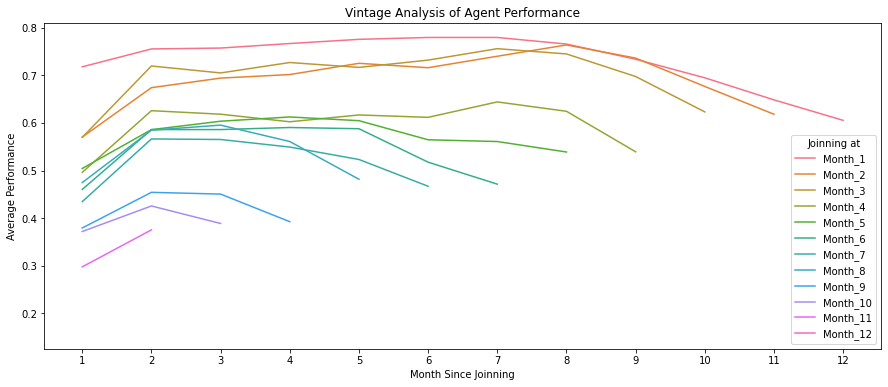

In [32]:
melt_new_df=new_df2.reset_index().melt(id_vars='index')
melt_new_df.columns=['Joinning at','Month Since Joinning','Average Performance']
display(new_df2)
fig,ax=plt.subplots(figsize=(15,6))
sns.lineplot(x='Month Since Joinning',y='Average Performance',data=melt_new_df,hue='Joinning at')
plt.title('Vintage Analysis of Agent Performance')
plt.show()

,Month Since Joinning,Percentage of Good Label
0,1,0.467503
1,2,0.585845
2,3,0.599409
3,4,0.602329
4,5,0.610643
5,6,0.611667
6,7,0.691983
7,8,0.744762
8,9,0.715493
9,10,0.676525


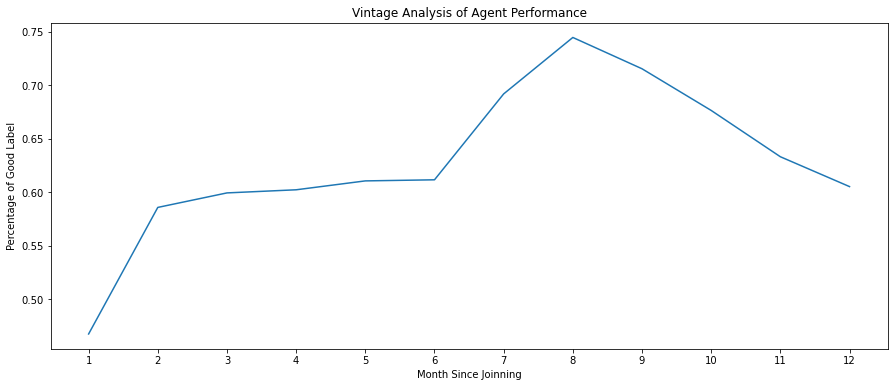

In [51]:
new_df3=pd.DataFrame(new_df2.median(),columns=['Percentage of Good Label']).reset_index()
new_df3.columns=['Month Since Joinning','Percentage of Good Label']
display(new_df3)

fig,ax=plt.subplots(figsize=(15,6))
sns.lineplot(x='Month Since Joinning',y='Percentage of Good Label',data=new_df3)
plt.title('Vintage Analysis of Agent Performance')
plt.show()

Text(0.5, 1.0, 'Good Merchant Boxplot Based on Month Since Joinning')

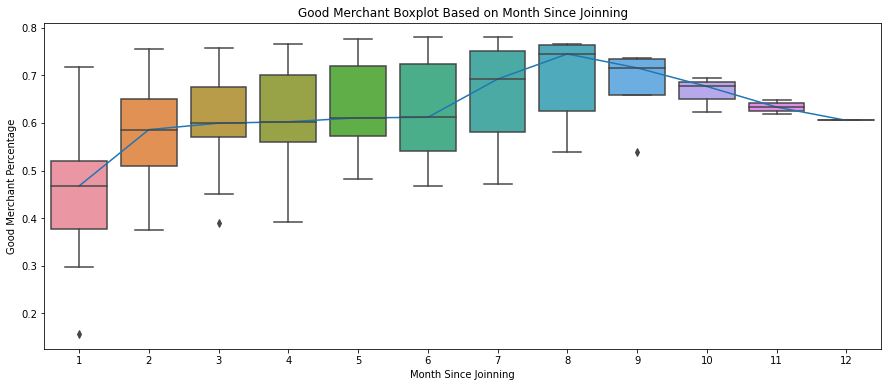

In [52]:
fig,ax=plt.subplots(figsize=(15,6))
new_df4=new_df2.melt()
sns.boxplot(x='variable',y='value',data=new_df4)
sns.lineplot(x='Month Since Joinning',y='Percentage of Good Label',data=new_df3)
plt.xlabel('Month Since Joinning')
plt.ylabel('Good Merchant Percentage')
plt.title('Good Merchant Boxplot Based on Month Since Joinning')

In [53]:
new_df4

,variable,value
0,1,0.717718
1,1,0.570205
2,1,0.569665
3,1,0.496112
4,1,0.504242
...,...,...
139,12,NaN
140,12,NaN
141,12,NaN
142,12,NaN


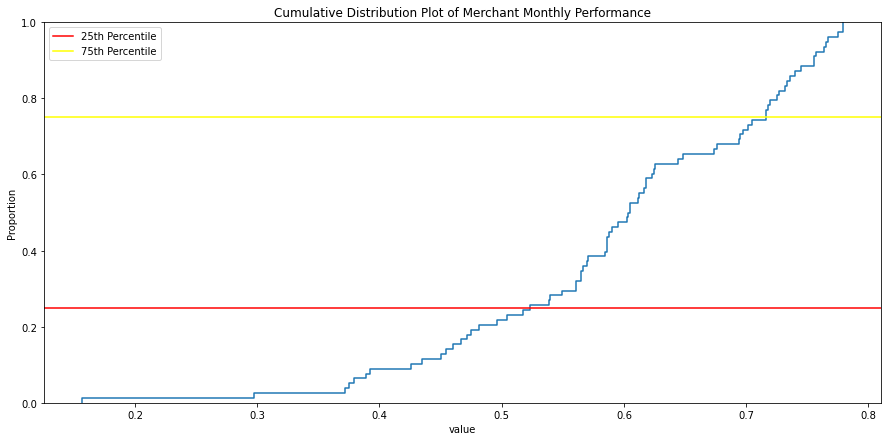

In [60]:
fig,ax=plt.subplots(figsize=(15,7))
sns.ecdfplot(new_df4['value'])
plt.axhline(0.25,color='red',label='25th Percentile')
plt.axhline(0.75,color='yellow',label='75th Percentile')
plt.title('Cumulative Distribution Plot of Merchant Monthly Performance')
plt.legend()
plt.show()